<a href="https://colab.research.google.com/github/Obad00/Billets/blob/main/Travail_2_Algo_g%C3%A9n%C3%A9tique_trou%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

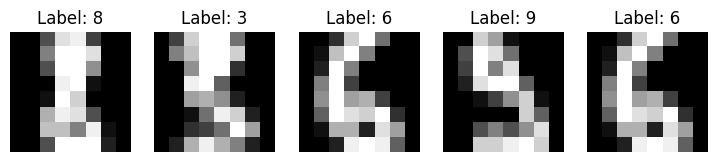

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Charger le dataset Digits depuis scikit-learn
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Afficher quelques images du dataset
num_images_to_display = 5

plt.figure(figsize=(9, 3))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    random_index = np.random.randint(0, len(X))
    plt.imshow(X[random_index].reshape(8, 8), cmap='gray')  # Les images Digits sont de taille 8x8
    plt.title(f"Label: {y[random_index]}")
    plt.axis('off')

plt.show()


# Programme troué à compléter:

Rappel, vous devez exécuter les blocs modifiés de code qui ont une incidence sur la partie exécutée.

In [ ]:
# Le code est complet et fonctionnel ici.   (0 point)
# Importer les bibliothèques nécessaires
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
from statistics import mean

In [ ]:
# Le code est complet et fonctionnel ici.   (0 point)
# Vous n'avez rien à changer, sinon changer les valeurs des variables pour faire des tests.
# Vous pouvez changer les valeurs des variables suivantes pour tester.
#    nb_generation_max = 3
#    taux_mutation = 0.05
#    taille_population = 10
#    nombre_meilleurs_conserves = 5

class algo_genetique:
    """
    Classe implémentant un algorithme génétique pour l'optimisation d'un modèle MLP.

    Attributes:
    - digits (obj): Les données MNIST.
    - X_train (array): Les données d'entraînement.
    - X_test (array): Les données de test.
    - y_train (array): Les étiquettes d'entraînement.
    - y_test (array): Les étiquettes de test.
    - gene_hidden_layer_sizes (list): Le domaine des valeurs possibles pour la taille de la couche cachée.
    - gene_max_iter (list): Le domaine des valeurs possibles pour le nombre maximal d'itérations.
    - gene_solver (list): Le domaine des valeurs possibles pour le solveur du modèle MLP.
    - gene_learning_rate (list): Le domaine des valeurs possibles pour le taux d'apprentissage du modèle MLP.
    - population_chromosomes (list): La population de chromosomes représentant les configurations du modèle MLP.
    - nb_generation_max (int): Le nombre maximal de générations à effectuer.
    - taux_mutation (float): Le taux de mutation dans l'algorithme génétique.
    - taille_population (int): La taille de la population de chromosomes.
    - nombre_meilleurs_conserves (int): Le nombre de meilleurs chromosomes conservés à chaque génération.

    Methods:
    - __init__(): Le constructeur de la classe, initialise les données et divise l'ensemble de données MNIST.
    - random_initial_population(): Initialise la population initiale de chromosomes de manière aléatoire.
    - mutate(individual): Mutate un individu en choisissant de nouvelles valeurs parmi les gènes permis.
    - breeding(parent1, parent2): Reproduit deux individus (crossover) avec mutation éventuelle.
    - selection(): Sélectionne les meilleurs individus de la population et applique la reproduction aux individus restants.
    - fitness(chromosome): Évalue la performance d'un chromosome en utilisant un modèle MLP.
    - evolution(): Simule le processus d'évolution de la population de chromosomes.
    - affiche_graphique(graphique_performance_moyenne): Affiche un graphique de la performance moyenne au fil des générations.
    """

    # Propriétés
    digits = None
    X_train = None
    X_test = None
    y_train = None
    y_test = None

    # Définition du domaine des gênes. (valeurs possibles pour chacun)
    gene_hidden_layer_sizes = [(2,), (5,), (50,), (100,), (50, 50,), (10, 10, 10,)]
    gene_max_iter = [100, 500, 1000, 5000]
    gene_solver = ["adam", "lbfgs", "sgd"]
    gene_learning_rate = [0.01, 0.005, 0.001]

    # Le vecteur des chromosomes
    population_chromosomes = []

    # Paramètres importants de l'algorithme génétiques
    # Nombre de génération maximal à effectuer
    nb_generation_max = 3
    # Le taux de mutation
    taux_mutation = 0.05
    # La taille de la population de chromosomes
    taille_population = 10
    # Le nombre de chromosomes conservés (les meilleurs) par génération
    nombre_meilleurs_conserves = 5


In [1]:
    # Complétez la méthode (2 point)
    def __init__(self):
      """
      Initialise l'algorithme génétique en chargeant la base de données MNIST et en divisant les données en ensembles d'entraînement et de test.
      """
      print("Initialisation de l'algorithme génétique et chargement des données...")
      # Charger la base de données
      self.digits = datasets.load_digits()
      # Extraire les données (X) et les étiquettes (y)
      X, y = self.digits.data, self.digits.target
      # Diviser les données en ensembles d'entraînement et de test
      # Données d'entrainement: 75%
      # Données test: 25%
      self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.25, random_state=42
        )



In [4]:
    # Complétez la méthode (2 point)
    def random_initial_population(self):
      """
      Initialise la population initiale de chromosomes de manière aléatoire.
      """
      print("Initialisation de la population de chromosomes...")
      self.population_chromosomes = []  # Liste pour stocker les chromosomes de la population

      # On boucle sur la totalité des chromosomes du vecteur de la population.
      for i in range(self.taille_population):
        # Choix aléatoire de chacun des gênes qui constituent de chromosome.
        # La structure du chromosome est la suivante:
        # Un dictionnaire un_chromosome avec les données suivantes:
        # fitness:  Le resultat de la fonction fitness pour cette configuration de chromosome.
        # gene_hidden_layer_size:  Le gêne qui contient la configuration du RDN.
        # gene_max_iter: Le nombre d'itération maximum du MLP.
        # gene_solver: Le type d'apprentissage du MLP
        # gene_learning_rate: Le taux d'apprentissage du MLP.

        un_chromosome = {
          "hidden_layer_sizes": random.choice(self.gene_hidden_layer_sizes),  # Choix du gène de configuration RDN
          "max_iter": random.choice(self.gene_max_iter),  # Choix du gène pour le nombre d'itérations
          "solver": random.choice(self.gene_solver),  # Choix du gène pour le type d'apprentissage
          "learning_rate": random.choice(self.gene_learning_rate),  # Choix du gène pour le taux d'apprentissage
        }

        un_chromosome["fitness"] = self.fitness(un_chromosome)  # Calcul du fitness pour ce chromosome

        # Ajout du chromosome à la population de chromosomes (self.population_chromosomes)
        self.population_chromosomes.append(un_chromosome)


In [10]:
  # Complétez la méthode (2 point)
  def mutate(self, individual):
      """
      Mutation d'un individu en choisissant une nouvelle valeur parmi les gènes permis.

      Parameters:
      - individual (dict): Individu à muter.

      Returns:
      - mutated_individual (dict): Individu muté.
      """

      # On fait une copie du vecteur individual dans mutated_individual
      mutated_individual = individual.copy()

      # Mutation de l'un des gênes.
      # Choix aléatoire du gêne à muter avec random.choice, et retour dans la variable key
      key = random.choice(["hidden_layer_sizes", "max_iter", "solver", "learning_rate"])

      # Teste quel est la clé (key), et assigne une nouvelle valeur avec random.choice, dans le domaine du gêne.
      if key == "hidden_layer_sizes":
          mutated_individual[key] = random.choice(self.gene_hidden_layer_sizes)
      elif key == "max_iter":
          mutated_individual[key] = random.choice(self.gene_max_iter)
      elif key == "solver":
          mutated_individual[key] = random.choice(self.gene_solver)
      elif key == "learning_rate":
          mutated_individual[key] = random.choice(self.gene_learning_rate)

      # Retourne mutated_individual
      return mutated_individual


In [9]:
  # Complétez la méthode (2 point)
  def breeding(self, parent1, parent2):
      """
      Reproduction des individus (crossover) avec mutation éventuelle.

      Parameters:
      - parent1 (dict): Premier parent.
      - parent2 (dict): Deuxième parent.

      Returns:
      - child (dict): Nouvel individu résultant de la reproduction.
      """

      # Déclaration de l'enfant à créer (un dictionnaire vide)
      child = {}

      # Tire un nombre aléatoire entre 1 et la taille du parent chromosome.
      # Ce nombre va représenter la position de la coupure (point de crossover)
      crossover_point = random.randint(1, len(parent1) - 1)

      # Copie les genes de parent1 jusqu'au point de crossover
      for i in range(crossover_point):
          key = list(parent1.keys())[i]
          child[key] = parent1[key]

      # Copie les genes de parent2 à partir du point de crossover
      for i in range(crossover_point, len(parent2)):
          key = list(parent2.keys())[i]
          child[key] = parent2[key]

      # Possibilité de mutation aléatoire sur le nouvel individu.
      # Si le hasard est inférieur au taux de mutation, on applique une mutation
      if random.random() < self.taux_mutation:
          child = self.mutate(child)

      # Retourne l'enfant créé
      return child


In [7]:
# Complétez la méthode (2 point)
def selection(self):
    """
    Sélectionne les meilleurs individus de la population et applique la reproduction aux individus restants.

    Returns:
    - meilleurs (list): Liste des meilleurs individus conservés.
    """

    # Trier la population en fonction de la fonction fitness, du meilleur au moins bon
    population_triee = sorted(self.population_chromosomes, key=lambda x: x['fitness'], reverse=True)

    # Sélectionner les meilleurs individus en fonction de self.nombre_meilleurs_conserves
    # On garde les premiers éléments de la population triée
    meilleurs = population_triee[:self.nombre_meilleurs_conserves]

    # Appliquer la fonction breeding aux individus restants pour générer de nouveaux enfants
    for i in range(self.nombre_meilleurs_conserves, len(self.population_chromosomes)):
        # Choix des deux parents parmi les meilleurs
        parent1 = meilleurs[i % self.nombre_meilleurs_conserves]
        parent2 = meilleurs[(i + 1) % self.nombre_meilleurs_conserves]

        # Création d'un enfant en croisant les deux parents
        enfant = self.breeding(parent1, parent2)

        # Ajout de la valeur de fitness à l'enfant
        enfant["fitness"] = self.fitness(enfant)

        # Remplacement dans la population existante
        self.population_chromosomes[i] = enfant

    # Retourner la liste des meilleurs individus conservés
    return meilleurs


In [18]:
    # Complétez la méthode (5 point)
    def fitness(self, chromosome):
      """
      Évalue la performance d'un chromosome en utilisant un modèle MLP.

      Parameters:
      - chromosome (dict): Configuration du modèle représentée par le chromosome.

      Returns:
      - performance (float): Précision du modèle MLP basé sur la configuration donnée.
      """

       # Initialiser le modèle MLP avec les paramètres du chromosome
      model = MLPClassifier(
          hidden_layer_sizes=chromosome['hidden_layer_sizes'],
          max_iter=chromosome['max_iter'],
          solver=chromosome['solver'],
          learning_rate=chromosome['learning_rate'],
          random_state=42
      )

      # Entraîner le modèle sur l'ensemble d'entraînement
      model.fit(self.X_train, self.y_train)

      # Faire des prédictions sur l'ensemble de test
      y_pred = model.predict(self.X_test)

      # Calculer la précision du modèle
      performance = accuracy_score(self.y_test, y_pred)

      # Retourner la valeur de performance (précision du modèle)
      return performance



In [ ]:
    # Le code est complet et fonctionnel ici.   (0 point)
    def evolution(self):
      """
      Simule le processus d'évolution de la population de chromosomes.

      Returns:
      - Aucun
      """

      # Affichage d'une trace de début de traitement d'évolution
      print("Début du processus d'évolution.")
      # Appel de la fonction d'initialisation
      self.random_initial_population()
      # Déclation de 2 tableaux vides utiles pour la suite (calcul et graphiques)
      performance_generation = []
      graphique_performance_moyenne = []
      # Boucle sur les générations
      for generation in range(self.nb_generation_max):
        # Affiche la génération
        print("generation: " + str(generation))
        # Boucle sur les chromosomes.
        for i in range(len(self.population_chromosomes)):
          # Calcul la fitness pour chaque chromosomes de la population.
          self.population_chromosomes[i]['fitness'] = self.fitness(self.population_chromosomes[i])
          # On ajoute la fitness au tableau de performance de la génération
          performance_generation.append(self.population_chromosomes[i]['fitness'])
        # On calcul la moyenne de la performance de la population, et on l'ajoute au tableau de graphique
        graphique_performance_moyenne.append(mean(performance_generation))
        # On réeffectue la selection pour la prochaine génération.  On assigne le résultat de la fonction à la variable meiileurs
        meilleurs = self.selection()

      # On appelle l'affichage du grpahique
      self.affiche_graphique(graphique_performance_moyenne)
      # On affiche les meilleurs de la dernière génération.
      print("Meilleures configurations trouvées:")
      print(meilleurs)
      print("Fin des générations")

In [ ]:
    # Le code est complet et fonctionnel ici.   (0 point)
    def affiche_graphique(self, graphique_performance_moyenne):
      """
      Affiche un graphique de la performance moyenne au fil des générations.

      Parameters:
      - graphique_performance_moyenne (list): Liste des performances moyennes par génération.

      Returns:
      - None
      """

      # Affichage des courbes
      plt.plot(graphique_performance_moyenne)
      # Étiquettes
      plt.ylabel('Axe Y - Score')
      plt.xlabel('Axe X - Génération')
      # Affiche le graphique
      plt.show()

In [ ]:
# Le code est complet et fonctionnel ici.   (0 point)
# Ce code-ci va lancer votre algorithme génétique
ai = algo_genetique()
ai.evolution()